# Change Point Analysis

Change points are time points at which some feature of a data set changes. For detecting change points in a univariate time series we can use [`tsa.cp_pelt`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.tsa.html#naginterfaces.library.tsa.cp_pelt).

Consider the following time series, assumed to be from a Normal distribution

In [1]:
y = [
    0., 0.78, -0.02, 0.17, 0.04, -1.23, 0.24, 1.7, 0.77, 0.06,
    0.67, 0.94, 1.99, 2.64, 2.26, 3.72, 3.14, 2.28, 3.78, 0.83,
    2.8, 1.66, 1.93, 2.71, 2.97, 3.04, 2.29, 3.71, 1.69, 2.76,
    1.96, 3.17, 1.04, 1.5, 1.12, 1.11, 1., 1.84, 1.78, 2.39,
    1.85, 0.62, 2.16, 0.78, 1.7, 0.63, 1.79, 1.21, 2.2, -1.34,
    0.04, -0.14, 2.78, 1.83, 0.98, 0.19, 0.57, -1.41, 2.05, 1.17,
    0.44, 2.32, 0.67, 0.73, 1.17, -0.34, 2.95, 1.08, 2.16, 2.27,
    -0.14, -0.24, 0.27, 1.71, -0.04, -1.03, -0.12, -0.67, 1.15,
    -1.1, -1.37, 0.59, 0.44, 0.63, -0.06, -0.62, 0.39, -2.63, -1.63,
    -0.42, -0.73, 0.85, 0.26, 0.48, -0.26, -1.77, -1.53, -1.39, 1.68, 0.43,
]

We wish to look for changes in the mean, which is selected using the following `ctype` value in the NAG routine

In [2]:
ctype = 1

We are also assuming unit variance for this problem, which must be communicated to the NAG function using the `param` keyword argument

In [8]:
param = [2.0]

Find the change points

In [9]:
from naginterfaces.library import tsa
soln = tsa.cp_pelt(ctype, y, param=param)

The locations of the change points are in attribute `tau` of the return tuple, while the estimated distribution parameters are in attribute `sparam`.

Here is a table of the results:

In [10]:
print(' -- Change Points --         --- Distribution ---')
print(' Number     Position              Parameters')
print('='*50)
for tau_i, tau_val in enumerate(soln.tau):
    print('{:4d}       {:6d}    {:12.2f}    {:12.2f}'.format(
        tau_i+1, tau_val, soln.sparam[2*tau_i], soln.sparam[2*tau_i+1],
    ))

 -- Change Points --         --- Distribution ---
 Number     Position              Parameters
   1           12            0.34            2.00
   2           32            2.57            2.00
   3           70            1.18            2.00
   4          100           -0.23            2.00


Plot the time series, and also the change points as vertical lines with the corresponding means as horizontal lines

In [11]:
# Jupyter magic for displaying figures inline:
%matplotlib inline

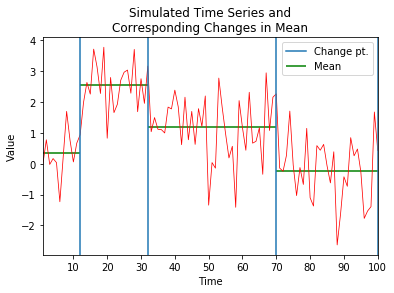

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(y)+1), y, color='r', linewidth=0.75)
last_cp = 1.
for tau_i, tau_val in enumerate(soln.tau):
    vl = plt.axvline(tau_val, label='Change pt.')
    hl = plt.hlines(
        soln.sparam[2*tau_i],
        xmin=last_cp, xmax=tau_val, color='g', label='Mean',
    )
    last_cp = tau_val
plt.xlim((1, len(y)))
plt.xticks(range(10, len(y)+1, 10))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(
    'Simulated Time Series and\n'
    'Corresponding Changes in Mean')
plt.legend(handles=[vl, hl], loc='upper right')
plt.show()